#Datacleaning

In [1]:
import pandas as pd

In [2]:
url_link = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue#:~:text=American%20retail%20corporation%20Walmart%20has,revenues%20exceeding%20US%24130%20billion.'

In [3]:
company_data = pd.read_html(url_link)

In [6]:
type(company_data)

pandas.core.frame.DataFrame

In [5]:
company_data = company_data[0] ##dataframe

In [8]:
company_data_backup = company_data.copy()

In [9]:
company_data_backup.head()

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1],State-owned,Ref.
,Rank,Name,Industry,USD millions,USD millions,Employees,Headquarters[note 1],State-owned,Ref.
0,1,Walmart,Retail,"$648,125","$15,511",2100000,United States,NaN,[1]
1,2,Amazon,Retail,"$574,785","$30,425",1525000,United States,NaN,[4]
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204",1361423,China,NaN,[5]
3,4,Saudi Aramco,Oil and gas,"$494,890","$129,699",73311,Saudi Arabia,NaN,[6]
4,5,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393",513434,China,NaN,[7]


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(company_data_backup):
    # Drop column: 'State-owned'
    company_data_backup = company_data_backup.drop(columns=['State-owned'])
    return company_data_backup

company_data_backup_clean = clean_data(company_data_backup.copy())
company_data_backup_clean.head()

In [24]:
## company_data = pd.DataFrame({'x': [1],'y' : [3]}) #to create a Dataframe
## company_data_backup = company_data_backup.drop(columns = ['x'], axis = 1) #drop a column in a dataframe

In [15]:
company_data.columns = company_data.columns.get_level_values(0) # access the values of a specific level in a MultiIndex
# access the values of a specific level in a MultiIndex

In [86]:
company_data_backup['Ranking'].dtype

dtype('O')

In [85]:
company_data_backup['Ranking'] = company_data_backup['Ranking'].astype(str)

In [94]:
company_data_backup.loc[[0, 1], ['Company Name', 'Revenue', 'Profit']]

,Company Name,Revenue,Profit
0,Walmart,"$648,125","$15,511"
1,Amazon,"$574,785","$30,425"


In [18]:
# droping the ref column from company_data
company_data.drop(columns= ['Ref.'], axis = 1, inplace=True)

In [22]:
# rename column self taught
company_data_backup.columns = ['Ranking', 'Company Name', 'Industry', 'Revenue', 'Profit', 'Employees',
       'Headquarters', 'State-owned', 'Revenue per worker']

In [28]:
#rename the columns
company_data.rename(
    columns= {
        "Rank": "Ranking",
        "Name": "Company Name",
        "Headquarters[note 1]" : "Headquarters"
    }, inplace=True)

In [35]:
company_data.head()

,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned
0,1,Walmart,Retail,"$648,125","$15,511",2100000,United States,NaN
1,2,Amazon,Retail,"$574,785","$30,425",1525000,United States,NaN
2,3,State Grid Corporation of China,Electricity,"$545,948","$9,204",1361423,China,NaN
3,4,Saudi Aramco,Oil and gas,"$494,890","$129,699",73311,Saudi Arabia,NaN
4,5,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393",513434,China,NaN


In [57]:
company_data['Industry'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     Retail
1                     Retail
2                Electricity
3                Oil and gas
4                Oil and gas
5                Oil and gas
6                Commodities
7     Information technology
8                 Healthcare
9                 Financials
10                Healthcare
11                Automotive
12               Oil and gas
13               Oil and gas
14              Construction
15                Automotive
16                Healthcare
17    Information technology
18                Healthcare
19    Information technology
20               Commodities
21                    Retail
22                Financials
23                Financials
24               Oil and gas
25               Commodities
26               Oil and gas
27                Healthcare
28                Automotive
29               Oil and gas
30                Financials
31               Electronics
32               Electronics

In [74]:
industry_company_group = company_data.groupby('Industry')
print(company_data_group)

Industry
Automotive                7
Commodities               3
Conglomerate              2
Construction              3
Electricity               1
Electronics               2
Financials                8
Healthcare                8
Information technology    3
Oil and gas               8
Retail                    4
Steel                     1
Name: Company Name, dtype: int64


In [76]:
industry_company_group.get_group('Oil and gas')

,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned
3,4,Saudi Aramco,Oil and gas,"$494,890","$129,699",73311,Saudi Arabia,NaN
4,5,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393",513434,China,NaN
5,6,China National Petroleum Corporation,Oil and gas,"$421,714","$21,294",1026301,China,NaN
12,13,ExxonMobil,Oil and gas,"$344,582","$36,010",61500,United States,NaN
13,14,Shell,Oil and gas,"$323,183","$19,359",103000,United Kingdom,NaN
24,25,TotalEnergies,Oil and gas,"$218,945","$21,384",102579,France,NaN
26,27,BP,Oil and gas,"$213,032","$15,239",79400,United Kingdom,NaN
29,30,Chevron,Oil and gas,"$200,949","$21,369",45600,United States,NaN


In [31]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       50 non-null     int64  
 1   Company Name  50 non-null     object 
 2   Industry      50 non-null     object 
 3   Revenue       50 non-null     object 
 4   Profit        50 non-null     object 
 5   Employees     50 non-null     int64  
 6   Headquarters  50 non-null     object 
 7   State-owned   0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


In [37]:
company_data.loc[2]

Ranking                                       3
Company Name    State Grid Corporation of China
Industry                            Electricity
Revenue                                $545,948
Profit                                   $9,204
Employees                               1361423
Headquarters                              China
State-owned                                 NaN
Name: 2, dtype: object

In [96]:
company_data_copy2.drop(columns= ['profit'], axis = 1, inplace=True)

In [40]:
company_data.loc[4]

Ranking                                       5
Company Name    China Petrochemical Corporation
Industry                            Oil and gas
Revenue                                $429,700
Profit                                   $9,393
Employees                                513434
Headquarters                              China
State-owned                                 NaN
Name: 4, dtype: object

In [48]:
company_data.loc[[2, 3], ['Profit', 'Employees']]

,Profit,Employees
2,"$9,204",1361423
3,"$129,699",73311


In [81]:
company_data_copy2['Revenue'] = company_data_copy2['Revenue'].str.replace('$', '')
company_data_copy2['Revenue'] = company_data_copy2['Revenue'].str.replace(',', '')
company_data_copy2['Revenue'] = company_data_copy2['Revenue'].astype(int)

In [104]:
company_data_copy2['Profit'] = company_data_copy2['Profit'].str.replace('−', '-', regex=False)  # Non-standard minus
company_data_copy2['Profit'] = company_data_copy2['Profit'].str.replace('–', '-', regex=False)  # En dash
company_data_copy2['Profit'] = company_data_copy2['Profit'].str.replace('—', '-', regex=False)  # Em dash
company_data_copy2['Profit'] = company_data_copy2['Profit'].astype(int)

In [109]:
dats_subset = company_data_copy2.loc[[i for i in range(1, 21)], ["Revenue", 'Profit']]

In [110]:
dats_subset

,Revenue,Profit
1,603651,159069
2,574785,30425
3,530009,8192
4,505000,15000
5,483019,21080
6,471154,9657
7,413680,55740
8,394328,99803
9,386201,20120
10,324162,20120


#summary statistics

In [111]:
#summary statistics
dats_subset.describe()

,Revenue,Profit
count,20.000000,20.000000
mean,380712.400000,26460.200000
std,109753.441536,41375.421481
min,263310.000000,-22819.000000
25%,292341.000000,6304.000000
50%,323314.500000,16671.500000
75%,474120.250000,23416.250000
max,603651.000000,159069.000000


In [129]:
#employees column
comp = company_data_copy2[1]

KeyError: 1

In [130]:
emp_data = company_data_copy2[company_data_copy2['Employees'] > 1000000]

In [131]:
emp_data


,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Revenue per worker
0,1,Walmart,Retail,611289,11680,2100000,United States,NaN,"$291,090.00"
2,3,Amazon,Retail,574785,30425,1525000,United States,NaN,"$376,908.20"
5,6,China National Petroleum Corporation,Oil and gas,483019,21080,1087049,China,NaN,"$444,339.68"


Grouping and Aggregating Data

In [133]:
company_data_copy2.head()


,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Revenue per worker
0,1,Walmart,Retail,611289,11680,2100000,United States,NaN,"$291,090.00"
1,2,Saudi Aramco,Oil and gas,603651,159069,70496,Saudi Arabia,NaN,"$8,562,911.37"
2,3,Amazon,Retail,574785,30425,1525000,United States,NaN,"$376,908.20"
3,4,State Grid Corporation of China,Electricity,530009,8192,870287,China,NaN,"$609,004.85"
4,5,Vitol,Commodities,505000,15000,1560,Switzerland,NaN,"$323,717,948.72"


In [135]:
company_data_copy2['Industry'].value_counts()

Industry
Oil and gas               13
Healthcare                 6
Financials                 5
Automotive                 5
Retail                     4
Commodities                3
Information technology     3
Construction               3
Electricity                2
Electronics                2
Conglomerate               2
Chemicals                  1
Steel                      1
Name: count, dtype: int64

<Axes: ylabel='Company Name'>

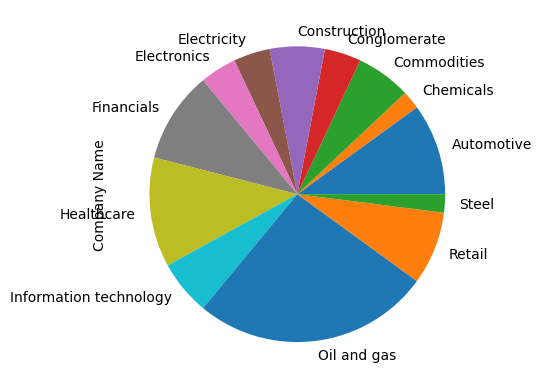

In [142]:
company_data_copy2.groupby('Industry')['Company Name'].count().plot(kind='pie')

In [36]:
Industry_grp= company_data.groupby('Industry')

In [37]:
Industry_grp.groups['Oil and gas'] # show index of groups

Index([3, 4, 5, 12, 13, 24, 26, 29], dtype='int64')

In [150]:
Industry_grp.get_group('Oil and gas') # get entrys that belong to stated group

,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Revenue per worker
1,2,Saudi Aramco,Oil and gas,603651,159069,70496,Saudi Arabia,NaN,"$8,562,911.37"
5,6,China National Petroleum Corporation,Oil and gas,483019,21080,1087049,China,NaN,"$444,339.68"
6,7,China Petrochemical Corporation,Oil and gas,471154,9657,527487,China,NaN,"$893,204.95"
7,8,ExxonMobil,Oil and gas,413680,55740,63000,United States,NaN,"$6,566,349.21"
9,10,Shell,Oil and gas,386201,20120,93000,United Kingdom,NaN,"$4,152,698.92"
20,21,TotalEnergies,Oil and gas,263310,20526,101279,France,NaN,"$2,599,847.94"
22,23,BP,Oil and gas,248891,-2487,67600,United Kingdom,NaN,"$3,681,819.53"
23,24,Chevron,Oil and gas,246252,35465,43846,United States,NaN,"$5,616,293.39"
36,37,Marathon Petroleum,Oil and gas,180012,14516,17800,United States,NaN,"$10,113,033.71"
37,38,Phillips 66,Oil and gas,175702,11024,13000,United States,NaN,"$13,515,538.46"


## missing values

In [153]:
company_data_copy.shape

(50, 9)

In [152]:
#subest the data
company_data_copy10 = company_data_copy[:10]

In [154]:
company_data_copy10.shape

(10, 9)

In [158]:
#checking for missing data
company_data_copy10.isnull()

,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,State-owned,Revenue per worker
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,True,False


In [159]:
company_data_copy10.isnull().sum()

Ranking                0
Company Name           0
Industry               0
Revenue                0
Profit                 0
Employees              0
Headquarters           0
State-owned           10
Revenue per worker     0
dtype: int64

## Data missing at Random

In [160]:
company_data_copy10.isna().sum()

Ranking                0
Company Name           0
Industry               0
Revenue                0
Profit                 0
Employees              0
Headquarters           0
State-owned           10
Revenue per worker     0
dtype: int64

In [161]:
company_data_copy10_1 =company_data_copy10.copy()

In [162]:
company_data_copy10_1.columns

Index(['Ranking', 'Company Name', 'Industry', 'Revenue', 'Profit', 'Employees',
       'Headquarters', 'State-owned', 'Revenue per worker'],
      dtype='object')

In [163]:
# omit the column with missing information 

In [164]:
company_data_copy10_1 = company_data_copy10_1[['Ranking', 'Company Name', 'Industry', 'Revenue', 'Profit', 'Employees',
       'Headquarters', 'Revenue per worker']]

In [166]:
    company_data_copy10_1.head()

,Ranking,Company Name,Industry,Revenue,Profit,Employees,Headquarters,Revenue per worker
0,1,Walmart,Retail,"$611,289","$11,680",2100000,United States,"$291,090.00"
1,2,Saudi Aramco,Oil and gas,"$603,651","$159,069",70496,Saudi Arabia,"$8,562,911.37"
2,3,Amazon,Retail,"$574,785","$30,425",1525000,United States,"$376,908.20"
3,4,State Grid Corporation of China,Electricity,"$530,009","$8,192",870287,China,"$609,004.85"
4,5,Vitol,Commodities,"$505,000","$15,000",1560,Switzerland,"$323,717,948.72"


In [167]:
company_data_copy10_2 =company_data_copy10.copy()

In [168]:
x = 2

In [169]:
x

2

In [170]:
y = x 

In [171]:
y

2

In [172]:
y is x

True

In [173]:
y == x

True

In [174]:
x = 3

In [175]:
y

2

In [205]:
lst = [1, 2, 3]

In [206]:
lst.append([4, 5])

In [207]:
print(len(lst))

4


In [208]:
z

NameError: name 'z' is not defined

In [210]:

lst = [‘a’, ‘b’, ‘c’]

lst.remove(‘b’)

lst.pop()

print(lst)


SyntaxError: invalid character '‘' (U+2018) (1743855702.py, line 1)

In [211]:
my_list = [1,2,3,4]

In [212]:
my_list.reverse()

In [213]:
my_list

[4, 3, 2, 1]

In [214]:
a = [1, 2]

In [215]:
b = a

In [216]:
a.append(3)

In [217]:
print(b)

[1, 2, 3]
